# Predict the price of a house

***Problem statement: The goal is to understand the relationship between house features and how these
variables affect the house price.***

***Data Extraction***

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [3]:
# Reading data in xlsx format to dataframe
houses = pd.read_excel("dataset.xlsx")

In [4]:
# Checking data frame
houses

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [5]:
# Renaming columns for simplicity
houses.columns=['date','age','metro_distance','convenience_stores','latitude','longitude','bedrooms','size','price']

In [6]:
# Shows various statistics of features (columns)
houses.describe()

,date,age,metro_distance,convenience_stores,latitude,longitude,bedrooms,size,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [7]:
# Cross checking all columns, for findind NAN/null values to data cleaning 
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                414 non-null    float64
 1   age                 414 non-null    float64
 2   metro_distance      414 non-null    float64
 3   convenience_stores  414 non-null    int64  
 4   latitude            414 non-null    float64
 5   longitude           414 non-null    float64
 6   bedrooms            414 non-null    int64  
 7   size                414 non-null    int64  
 8   price               414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


We have 414 rows of data and 414 non-null rows, hence not implmenting data cleaning

***Exploratory Data Analysis***

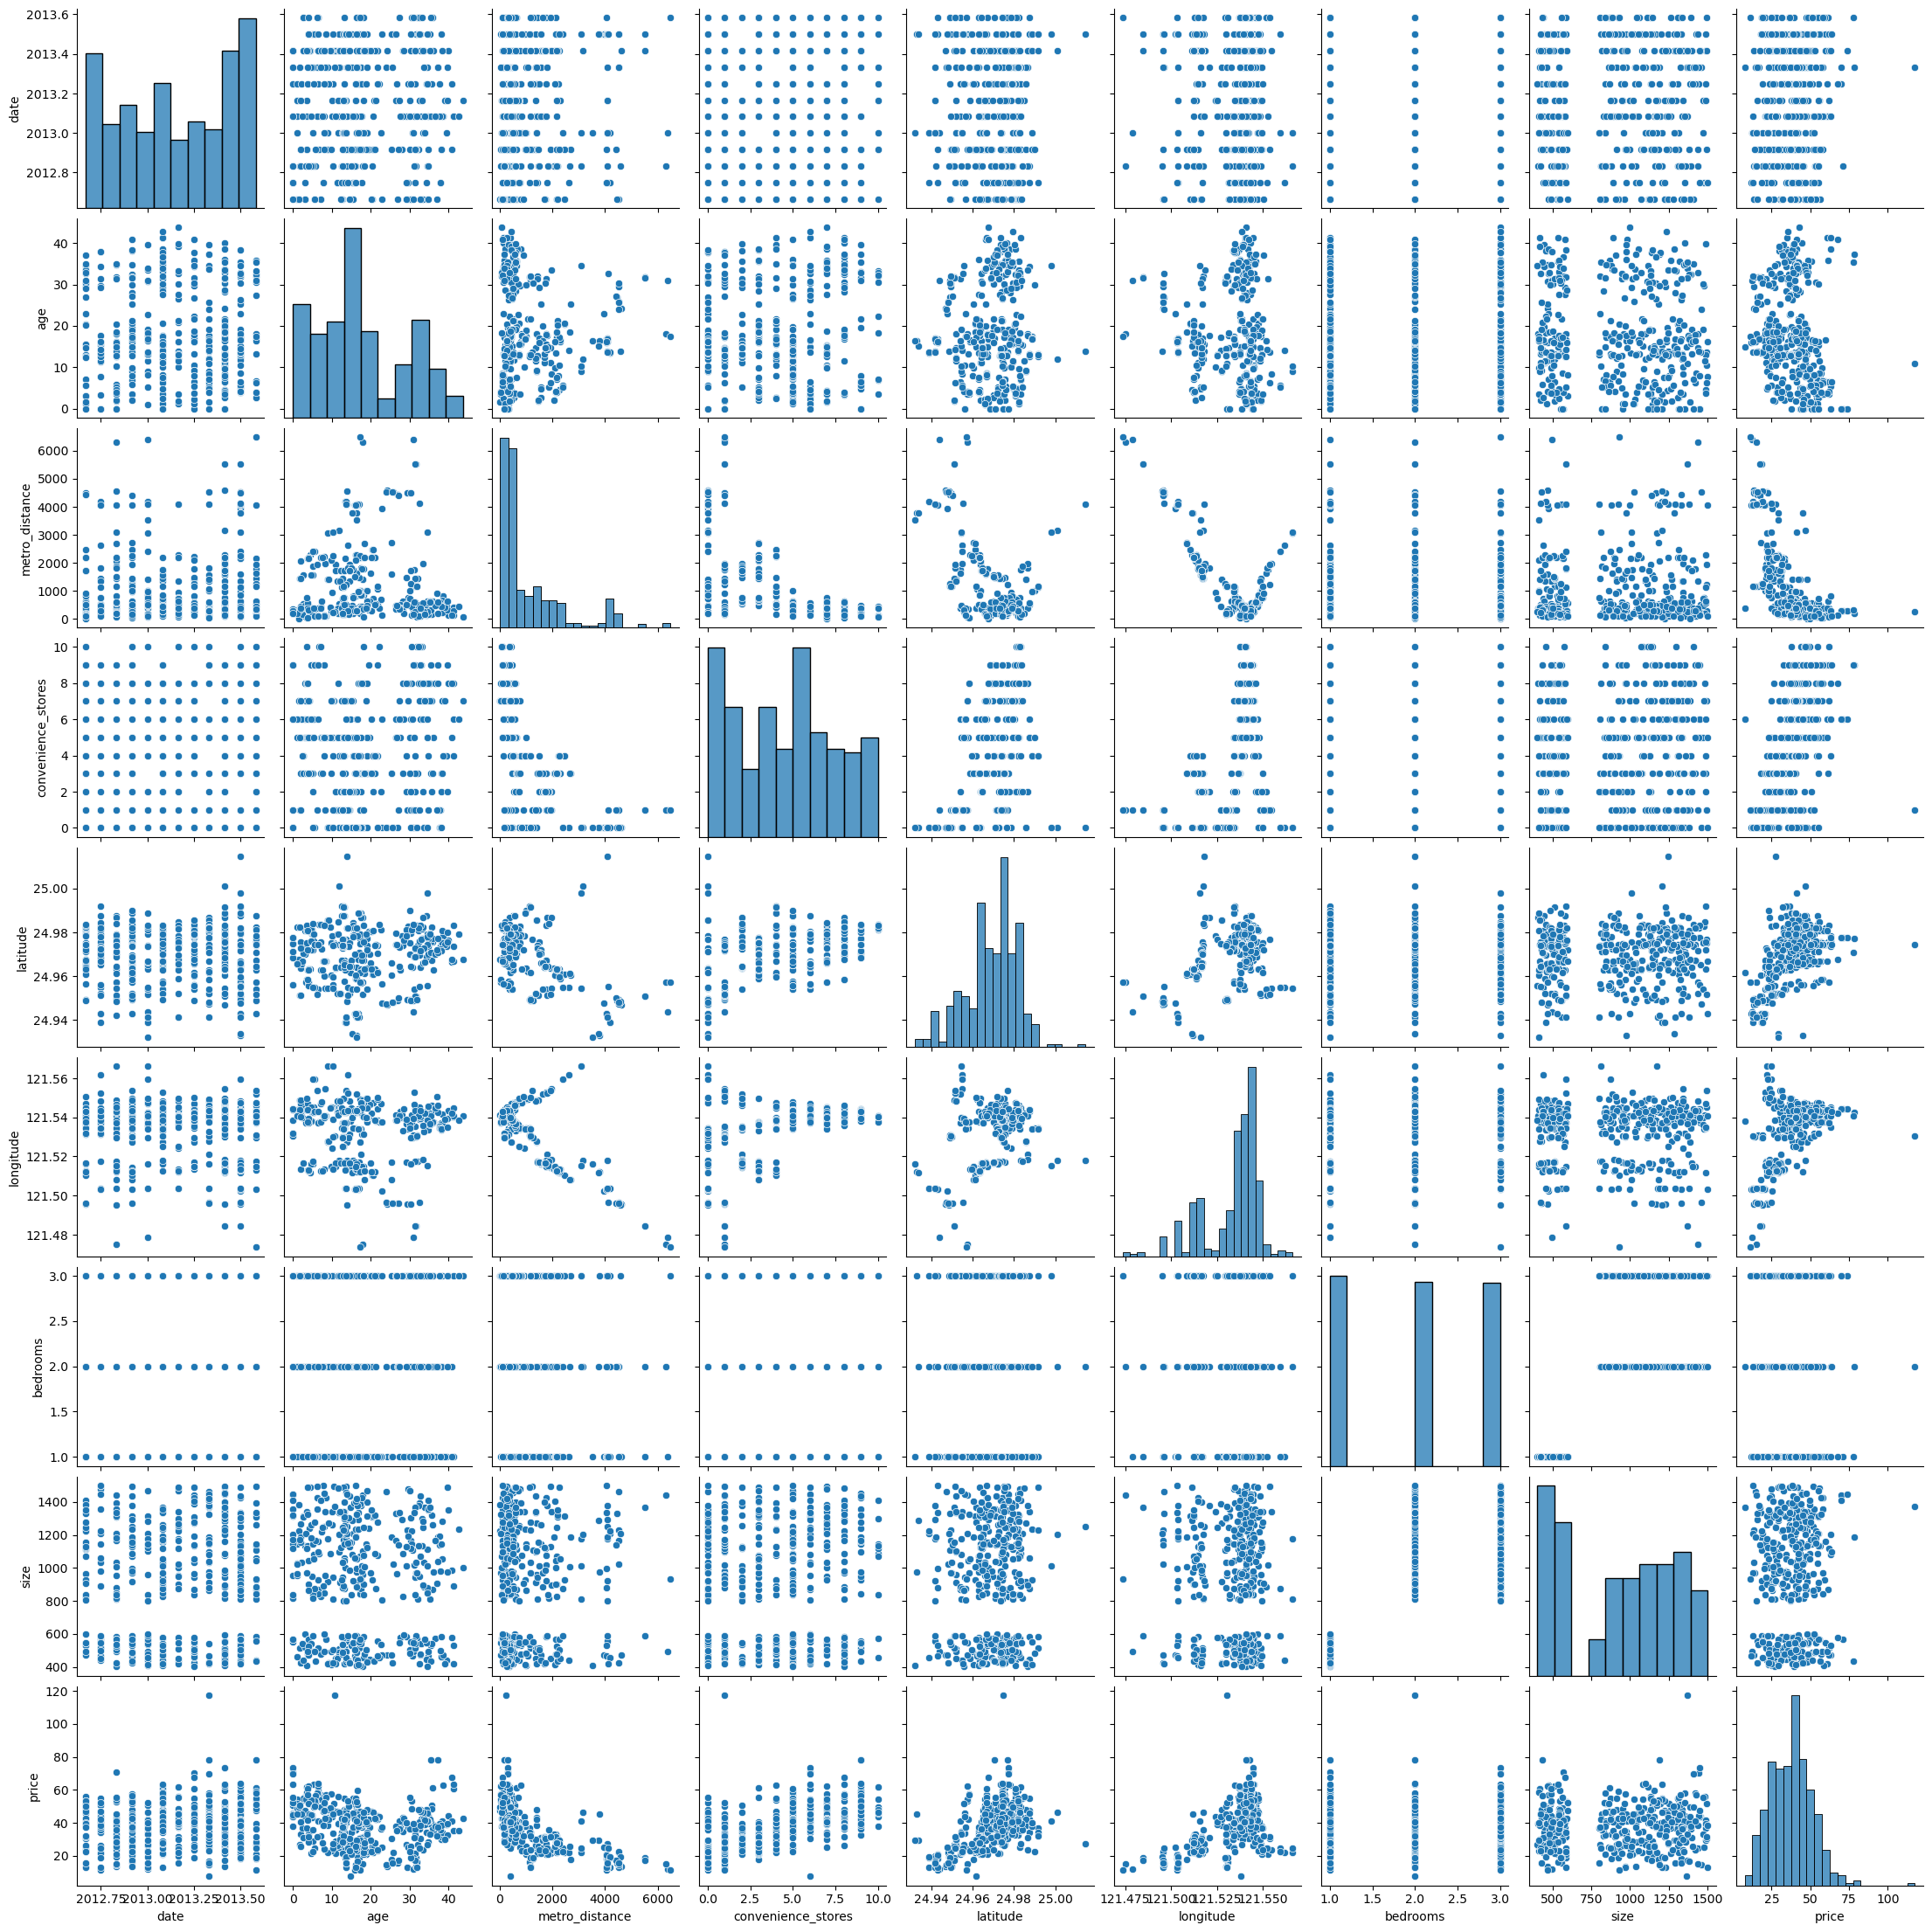

In [8]:
# Visualizing relations betweeen all columns
sns.pairplot(houses)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

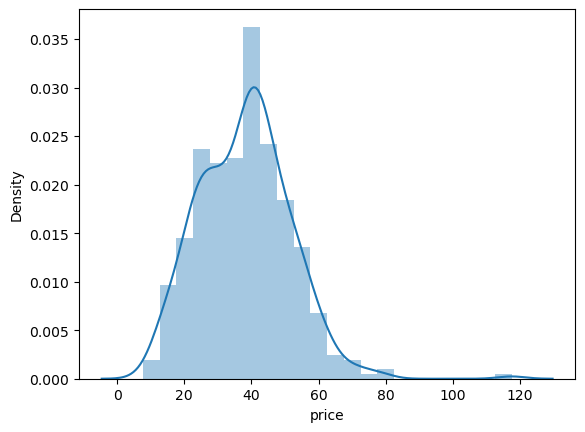

In [9]:
# Visualizing the data. distplot() works for continuously labelled data 
sns.distplot(houses.price)

From this we can observe that most of the price ranges are between 0 and 60, very few are till 120

In [11]:
# See if labels have features that might intuitively have a high correlation
houses.corr()

,date,age,metro_distance,convenience_stores,latitude,longitude,bedrooms,size,price
date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
metro_distance,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
convenience_stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
size,0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
price,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


In [12]:
# test the correlation individual labels
houses.corr()['price'].sort_values()

metro_distance       -0.673613
age                  -0.210567
size                  0.046489
bedrooms              0.050265
date                  0.087529
longitude             0.523287
latitude              0.546307
convenience_stores    0.571005
price                 1.000000
Name: price, dtype: float64

From here we can observe that convernience_stores and location(lantitudes and longitudes) have huge corelation to price comapred to others.

Below we are visualizing the relation between convernience_stores and location(lantitudes and longitudes) with prices

<AxesSubplot:xlabel='price', ylabel='convenience_stores'>

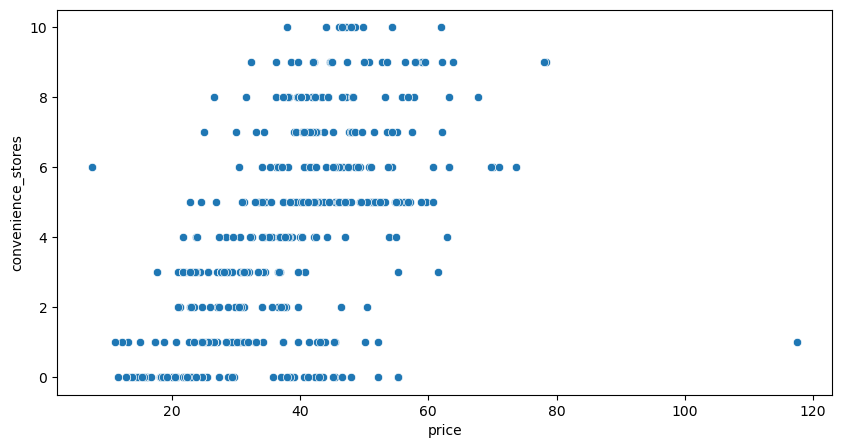

In [35]:
# Scatterplotting highly corelated feature
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='convenience_stores',data=houses)

<AxesSubplot:xlabel='price', ylabel='latitude'>

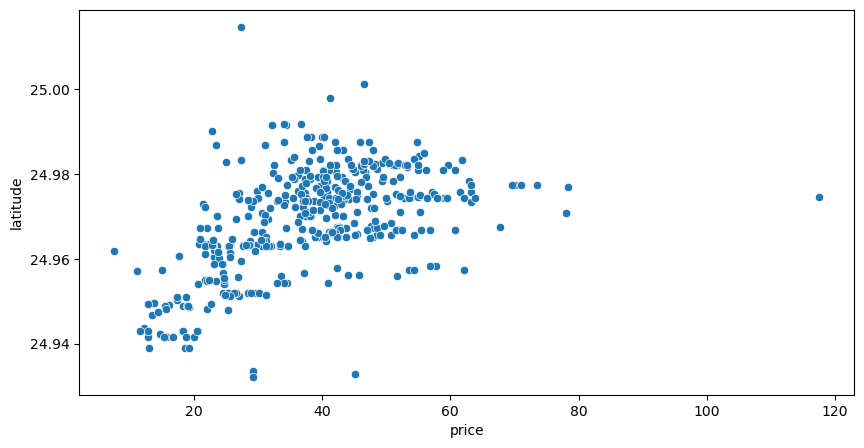

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='latitude',data=houses)

<AxesSubplot:xlabel='price', ylabel='longitude'>

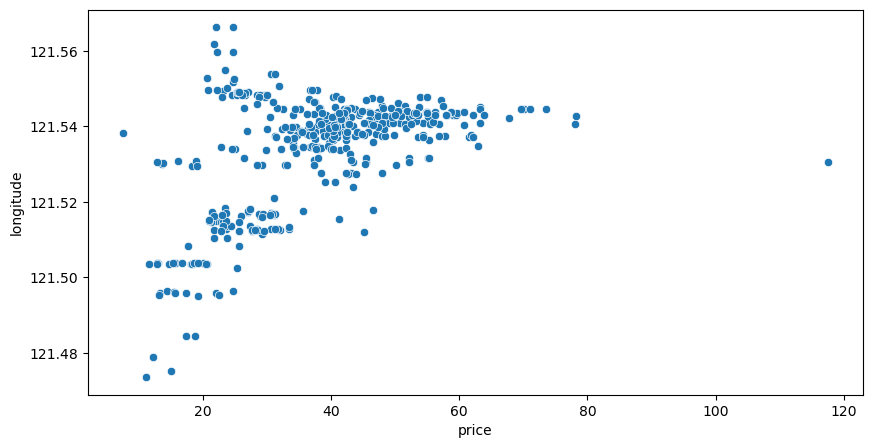

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='longitude',data=houses)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

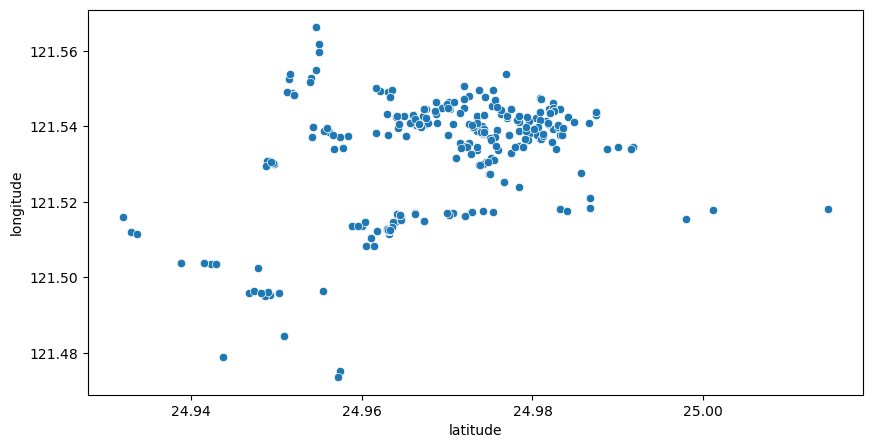

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='latitude',y='longitude',data=houses)

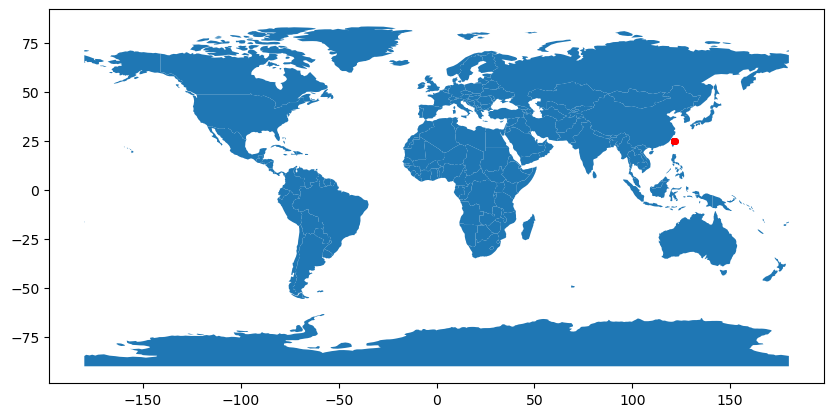

In [23]:
# Finding the location using latitude and longitudes

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(houses['longitude'], houses['latitude'])]
gdf = GeoDataFrame(houses, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

From above visualization we can observe that given house details belong to Taiwan

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

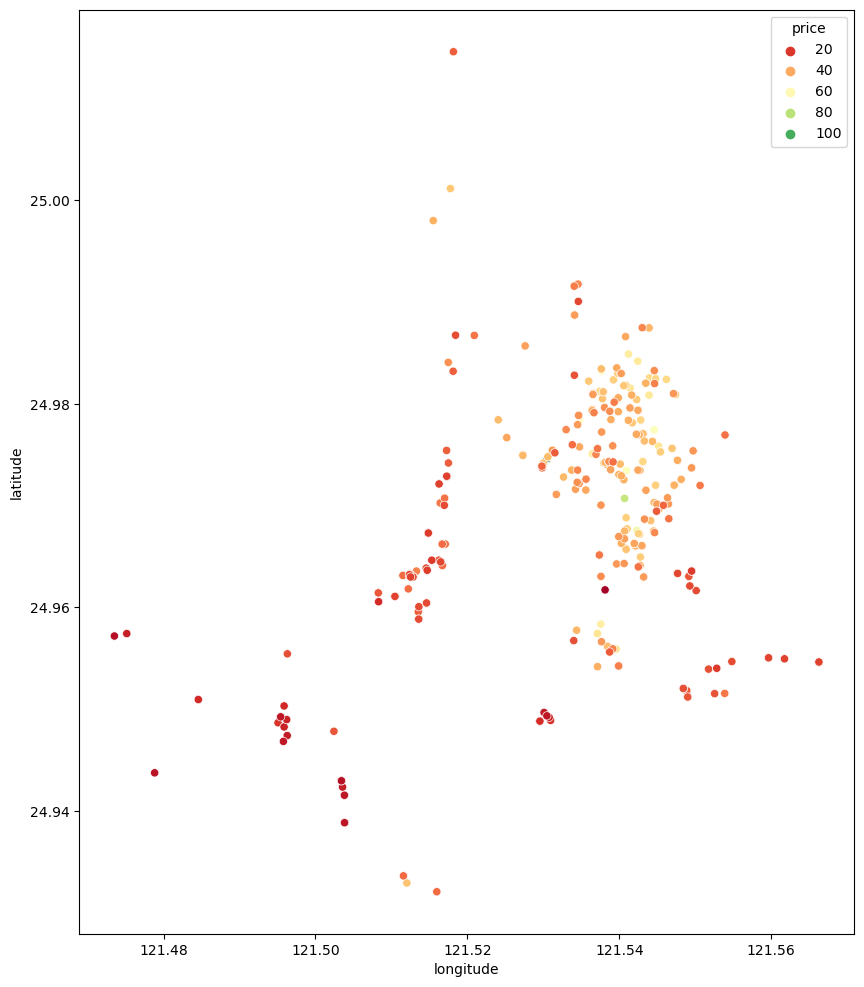

In [27]:
# Visualizing houses locations with different colour for thier prices
houses_sort = houses.sort_values('price',ascending=False).copy()
plt.figure(figsize=(10,12))
sns.scatterplot(x='longitude',y='latitude',data=houses_sort, hue='price',palette='RdYlGn')

We cannot arrive at exact conclusion but if we go by Taiwans map most of the cheapest houses are near national parks and generally prices increase as we go towards top 

In [ ]:
metro_distance       
age                  
size                  
bedrooms              
date   

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

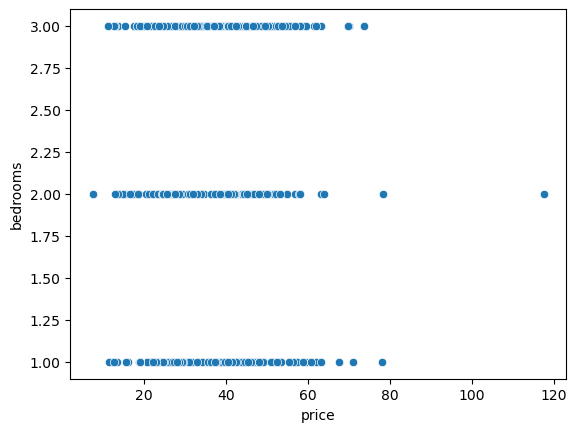

In [36]:
# Analyzing other features

sns.scatterplot(x='price',y='bedrooms',data=houses)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

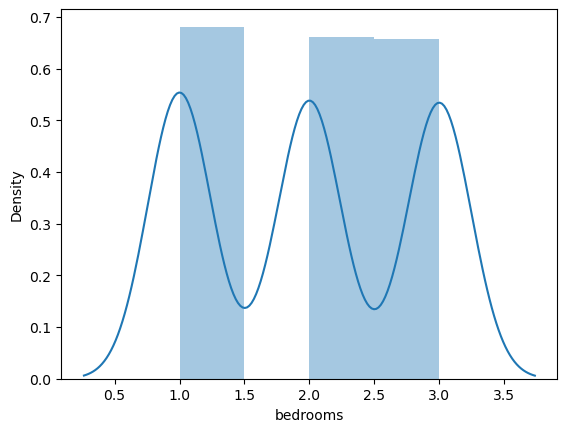

In [47]:
sns.distplot(houses.bedrooms)

We can see that number of houses with bedrooms 1,2,3 are almost same and they mostly lie below price range of 60-65.
But there is a house with 2 bedrooms with very high price which can be due to other features

<AxesSubplot:xlabel='price', ylabel='size'>

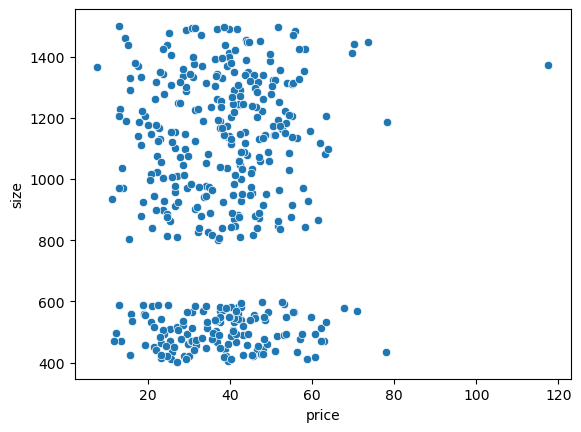

In [48]:
sns.scatterplot(x='price',y='size',data=houses)

We can observe that there are no or very few houses between size range of 600 and 800. Most density can be said between size range of 400 to 600 with an average price rangeof 20-60. 

<AxesSubplot:xlabel='price', ylabel='age'>

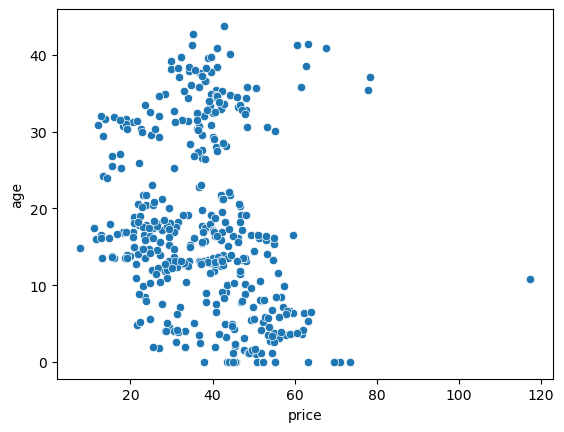

In [38]:
sns.scatterplot(x='price',y='age',data=houses)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

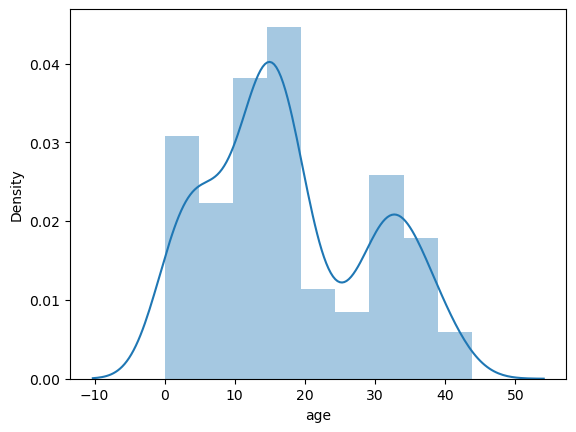

In [44]:
sns.distplot(houses.age)

Most of the houses are present in the age range of 10-20. Age of house is not mostly corelated to price. But most of the houses are in the range of 0-20 which are in the price range of 20-60.

<AxesSubplot:xlabel='price', ylabel='metro_distance'>

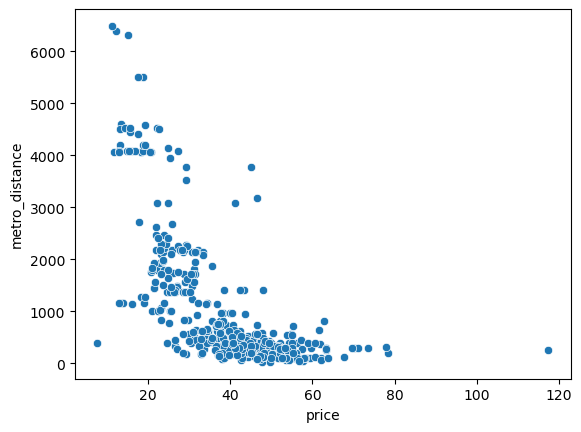

In [39]:
sns.scatterplot(x='price',y='metro_distance',data=houses)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='metro_distance', ylabel='Density'>

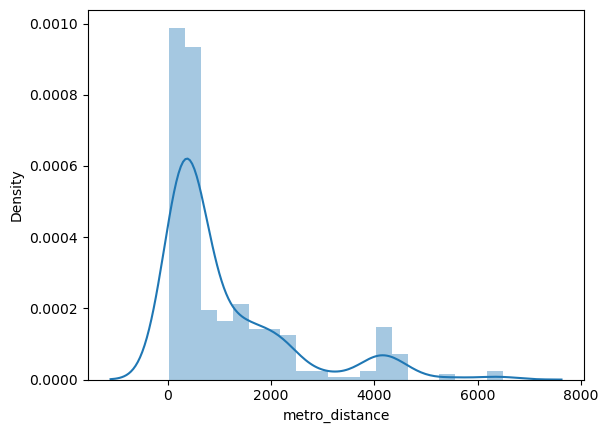

In [46]:
sns.distplot(houses.metro_distance)

Majority of houses are situated within metro distance of 2000 or 1500 and they fall in the price range of 20 -60

From the above graphs we can say that the most of the houses are within price range of 20-60 with feature classifcation such as metro distance within 1000km, house age less than 20. Most of the houses are situted in North-East of the country. Bedrooms and size are almost equally ditribued with price range of 20-60 (if we exclude size range of 600-800).However, there are very few deviations such as having high price for a house with higher age or with a grater metro distance andother. It may be due to other geographical or location particular features.

***Data training***

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [55]:
# Separting price and features
X = houses[['date','age','metro_distance','convenience_stores','latitude','longitude','bedrooms','size']]
y = houses['price']

In [58]:
# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

***Linear regression***

In [63]:
# Multiple Liner Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)

#predicting the test set result
y_pred = regressor.predict(X_test)


-12771.615807998778
[ 5.12624828e+00 -2.78259393e-01 -4.87072428e-03  9.77848212e-01
  2.27407955e+02 -2.61907812e+01 -6.03123151e-01  2.72457660e-03]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

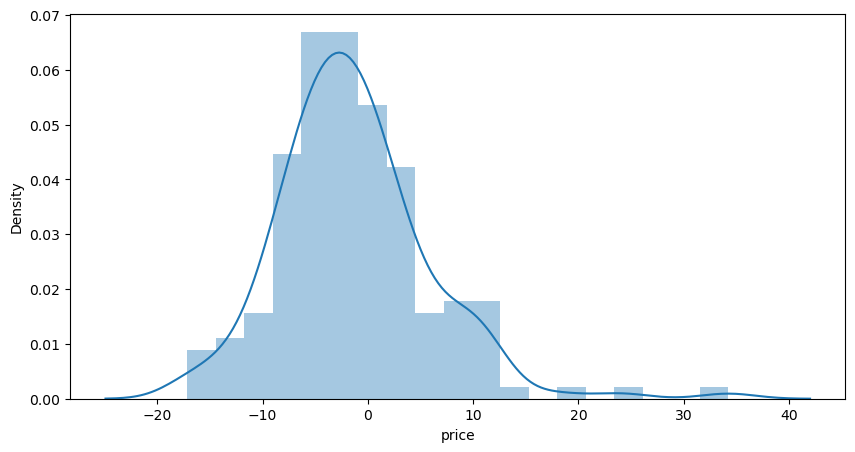

In [64]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [65]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 5.529481131337426
MSE: 53.323483503461304
RMSE: 7.302293030511807
VarScore: 0.6630845410391358


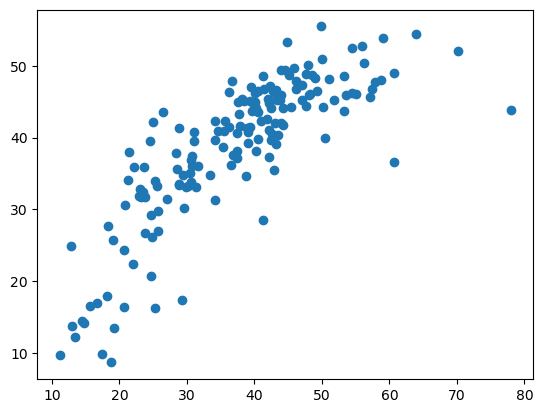

In [66]:
plt.scatter(y_test,y_pred)

In [69]:
regressor.score(X_train,y_train)

0.5421241898953805

From the distplot we can see that prices are not so normally distributed and from scatterplot we can see that they arent in straight line either. We can also observe the metric vales and say that this model is not a good fit.

***DecisionTreeRegressor***

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
decisionreg = DecisionTreeRegressor(random_state=101)
decisionreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [85]:
val_predictions = decisionreg.predict(X_test)

In [86]:
#compare actual output values with predicted values
y_pred = decisionreg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 6.634939759036145
MSE: 92.4321686746988
RMSE: 9.61416500142882
VarScore: 0.3974541686664228


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

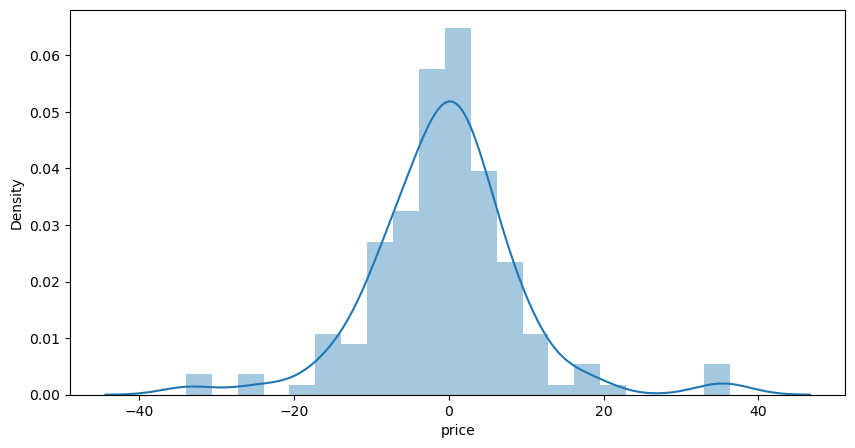

In [87]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

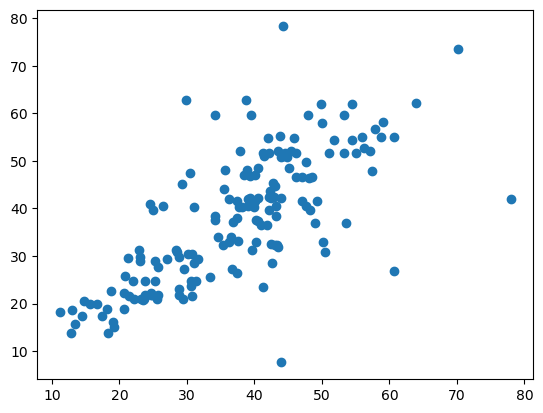

In [88]:
plt.scatter(y_test,y_pred)

From the distplot we can see that prices are not so normally distributed and from scatterplot we can see that they are almost forming a straight line (better than linear regression!). But we can search for more accurate models

***RandomForestRegressor***

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
RandforestReg = RandomForestRegressor(random_state=101)
RandforestReg.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [98]:
val_predictions = RandforestReg.predict(X_test)

In [99]:
#compare actual output values with predicted values
y_pred = RandforestReg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 4.601819277108435
MSE: 38.576464903614436
RMSE: 6.210995484108359
VarScore: 0.7495710485025404


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

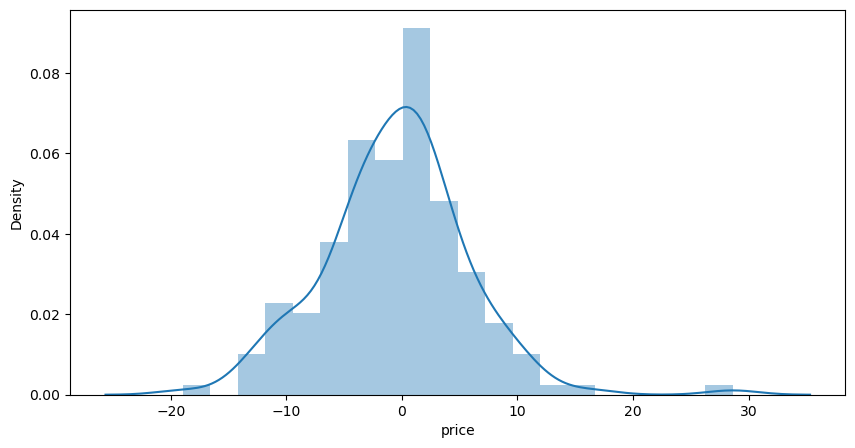

In [100]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

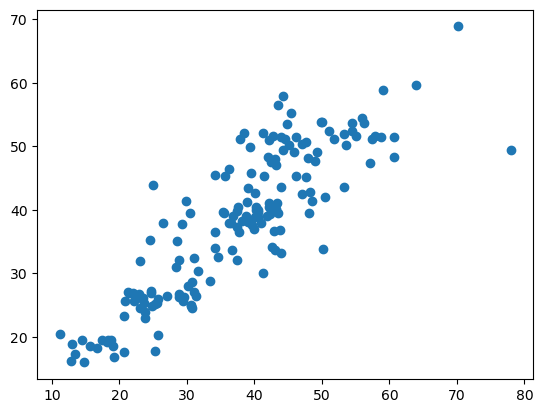

In [101]:
plt.scatter(y_test,y_pred)

The graph is slightly more uniformly ditributed than decisiontree and the scatter plot is more like a straight line(this implies that actual and predicted values are getting closer or the accuracy is increasing)

***GradientBoostingRegressor***

In [133]:
from sklearn.ensemble import GradientBoostingRegressor

In [134]:
gradReg = GradientBoostingRegressor(random_state=101)
gradReg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=101)

In [109]:
val_predictions = gradReg.predict(X_test)

In [141]:
#compare actual output values with predicted values
y_pred = gradReg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 4.831962915123437
MSE: 42.84184977570884
RMSE: 6.545368574473773
VarScore: 0.7197131657891211


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

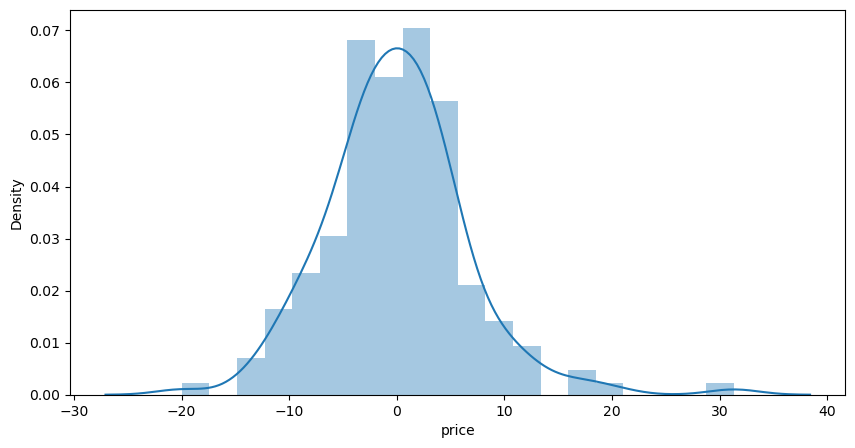

In [111]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

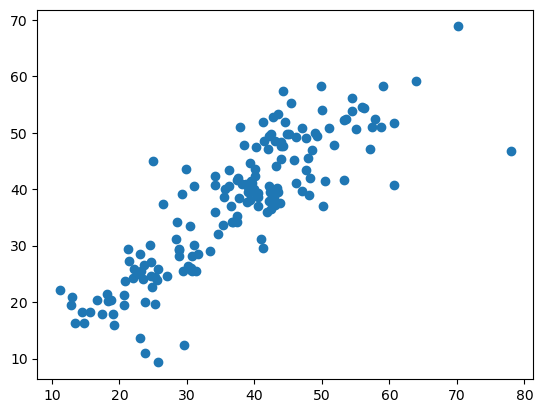

In [112]:
plt.scatter(y_test,y_pred)

***AdaBoostRegressor***

In [131]:
from sklearn.ensemble import AdaBoostRegressor

In [132]:
model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15), random_state=1, n_estimators=1000, loss='exponential').fit(X_train, y_train)
print("Model Score: ",model.score(X_train, y_train))

Model Score:  0.9996620793897937


In [135]:
val_predictions = model.predict(X_test)

In [142]:
#compare actual output values with predicted values
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 4.631927710843374
MSE: 42.33740963855423
RMSE: 6.506720344271316
VarScore: 0.7230577575031183


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

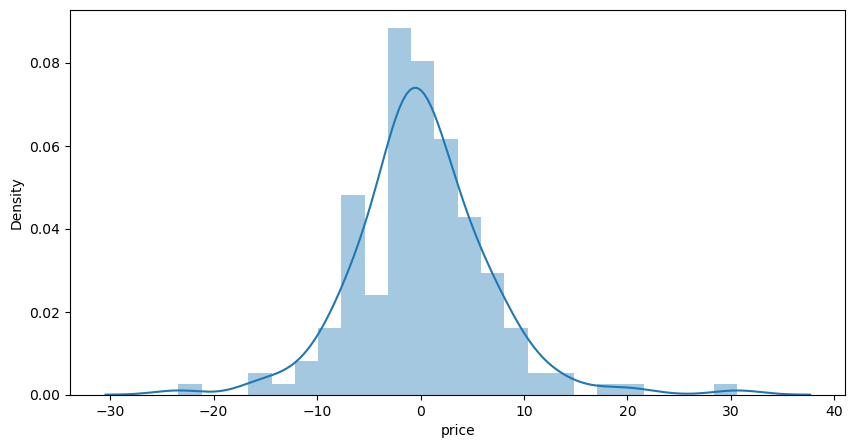

In [143]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

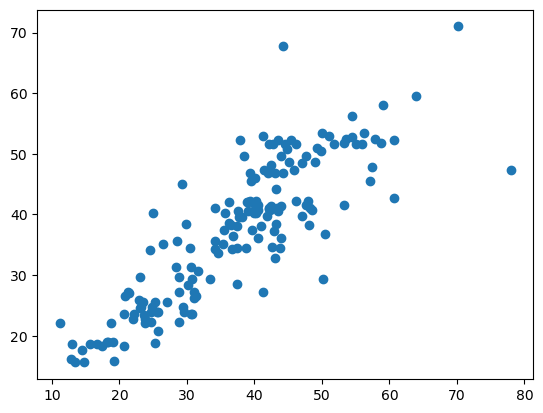

In [144]:
plt.scatter(y_test,y_pred)

Observing AdaBoostRegressor we can see that they are less precise than GradientBoostingRegressor considering the line is deviaitng and distribution is not so distributed comaratively. But the metrics of AdaBoostRegressor are clrearly better than GradientBoostingRegressor

Hence we can either use GradientBoostingRegressor or AdaBoostRegressor as they are almost similar having their pros and cons. These two are clearly better than other models such as linear regression,decisiontree,randomforest. (We can even consider using DL techniques and neural network methods such as Keras regression).